# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('max_columns', 100)

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import binom
from scipy.stats import uniform

In [7]:
#your code here
wnba = pd.read_csv('../data/wnba_clean.csv').drop(columns='Unnamed: 0')
wnba.head()
wnba.shape

(142, 32)

**Use describe() to take an initial look at the data.**

In [6]:
#your code here
wnba.describe()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,184.612676,78.978873,23.091214,27.112676,24.429577,500.105634,74.401408,168.704225,43.102817,14.830986,...,22.063380,61.591549,83.654930,44.514085,17.725352,9.781690,32.288732,203.169014,1.140845,0.007042
std,8.698128,10.996110,2.073691,3.667180,7.075477,289.373393,55.980754,117.165809,9.855199,17.372829,...,21.519648,49.669854,68.200585,41.490790,13.413312,12.537669,21.447141,153.032559,2.909002,0.083918
min,165.000000,55.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,16.700000,0.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,175.750000,71.500000,21.785876,24.000000,22.000000,242.250000,27.000000,69.000000,37.125000,0.000000,...,7.000000,26.000000,34.250000,11.250000,7.000000,2.000000,14.000000,77.250000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,27.000000,27.500000,506.000000,69.000000,152.500000,42.050000,10.500000,...,13.000000,50.000000,62.500000,34.000000,15.000000,5.000000,28.000000,181.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,30.000000,29.000000,752.500000,105.000000,244.750000,48.625000,22.000000,...,31.000000,84.000000,116.500000,66.750000,27.500000,12.000000,48.000000,277.750000,1.000000,0.000000
max,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,...,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

<function matplotlib.pyplot.show(close=None, block=None)>

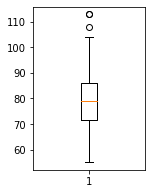

In [8]:
#your code here
plt.figure(figsize=(2,3))
plt.boxplot(x=wnba['Weight'])
plt.show

In [ ]:
wnba[wnba]

<function matplotlib.pyplot.show(close=None, block=None)>

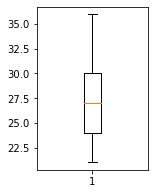

In [9]:
plt.figure(figsize=(2,3))
plt.boxplot(x=wnba['Age'])
plt.show

### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

<Figure size 576x432 with 0 Axes>

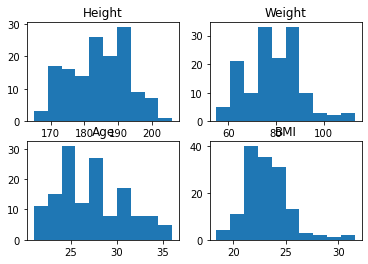

In [19]:
#your code here
plt.figure(figsize=(8,6))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.hist(wnba['Height'])
ax1.set_title('Height')

ax2.hist(wnba['Weight'])
ax2.set_title('Weight')

ax3.hist(wnba['Age'])
ax3.set_title('Age')

ax4.hist(wnba['BMI'])
ax4.set_title('BMI')

plt.show()

**What conclusions do you think we can take from this plots?**

In [6]:
#your conclusions here
# These four characteristics are kind of normally distributed among the players, with 
# variable kurtosis and skewness, for example for the height the kurtosis is very low, 
# suggesting that the height is more uniformily distributed, or at leaste there is not 
# a big concentration around a mean value.

In addition to what the describe() method already told us we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities. 

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals. 

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

<Figure size 864x720 with 0 Axes>

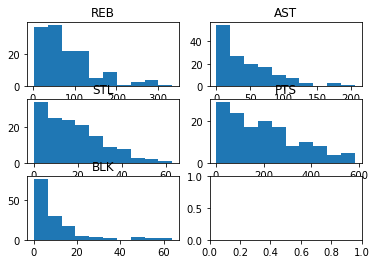

In [24]:
#your code here
plt.figure(figsize=(12,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6 )) = plt.subplots(nrows=3, ncols=2)

ax1.hist(wnba['REB'])
ax1.set_title('REB')

ax2.hist(wnba['AST'])
ax2.set_title('AST')

ax3.hist(wnba['STL'])
ax3.set_title('STL')

ax4.hist(wnba['PTS'])
ax4.set_title('PTS')

ax5.hist(wnba['BLK'])
ax5.set_title('BLK')

plt.show()

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here
# All these characteristics are distributed with a high skew to the right.

As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.** 

In [27]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [32]:
#your code here
# Calculate points, assists, blocks, rebounds and steals per minute
wnba['REB_min'] = wnba['REB']/wnba['MIN']
wnba['AST_min'] = wnba['AST']/wnba['MIN']
wnba['STL_min'] = wnba['STL']/wnba['MIN']
wnba['PTS_min'] = wnba['PTS']/wnba['MIN']
wnba['BLK_min'] = wnba['BLK']/wnba['MIN']
wnba.columns
# wnba.head(3)

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'PTS_min', 'REB_min', 'AST_min', 'STL_min', 'BLK_min'],
      dtype='object')

<Figure size 864x720 with 0 Axes>

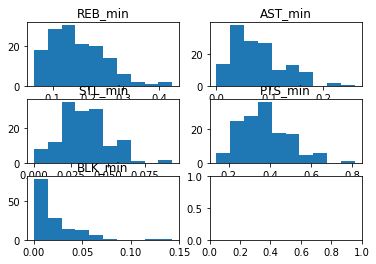

In [33]:
#your code here
# Plot points, assists, blocks, rebounds and steals per minute 
plt.figure(figsize=(12,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6 )) = plt.subplots(nrows=3, ncols=2)

ax1.hist(wnba['REB_min'])
ax1.set_title('REB_min')

ax2.hist(wnba['AST_min'])
ax2.set_title('AST_min')

ax3.hist(wnba['STL_min'])
ax3.set_title('STL_min')

ax4.hist(wnba['PTS_min'])
ax4.set_title('PTS_min')

ax5.hist(wnba['BLK_min'])
ax5.set_title('BLK_min')

plt.show()

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here
# With the exception of the blocks, the distribution of game features changes when we calculate 
# them per minute played. Now the distributions are less skewed.

### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

In [36]:
wnba[wnba['FT%']

0      80.8
1      78.0
2      83.3
3      81.0
4      91.7
       ... 
137    84.5
138    66.7
139    92.2
140    81.5
141    78.6
Name: FT%, Length: 142, dtype: float64

In [ ]:
#your comments here